# **Example: Calculations for Mountains**

This file demonstrates how to use MUTE to calculate underground fluxes and intensities for labs under mountains.

## Import Packages

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

import mute.constants as mtc
import mute.underground as mtu

*************************************************************************
*                                                                       *
*                ███████████████████████████████████████                *
*                ▓  ▓▓▓▓  ▓▓  ▓▓▓▓  ▓▓        ▓▓       ▓                *
*                ▓   ▓▓   ▓▓  ▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓▓                *
*                ▒        ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒       ▒                *
*                ▒  ▒  ▒  ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒▒                *
*                ░  ░░░░  ░░░░    ░░░░░░░  ░░░░░       ░                *
*                ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                *
*                   https://github.com/wjwoodley/mute                   *
*                                                                       *
* Author:  William Woodley                                              *
* Version: 3.0.0                                                        *
*                                     

## Set the Constants

In [2]:
mtc.set_verbose(2)
mtc.set_output(False)
mtc.set_lab("Mountain")
mtc.set_overburden("mountain")
mtc.set_medium("rock")
mtc.set_reference_density(2.65)
mtc.set_n_muon(1000000)

Setting overburden to mountain and resetting flat overburden constants.


## Load the Mountain Profile from a File

In order to calculate any values for mountains, the mountain profile must first be defined, using the ``mtc.load_mountain()`` function. This function accepts the path to the text file as its first argument. The file should have three columns:

1. Zenith angle in degrees
2. Azimuthal angle in degrees
3. Slant depth

The correct format can be seen in the ``example_mountain_profile.txt`` file, which will be used in this example. The mountain shape in this file is a hemisphere with the lab located at (0.4, 0.6, 1.2) km.w.e. relative to the center of the hemisphere.

Additional optional arguments to the function include units, if the slant depths are not in km.w.e., rock density used in the file, and a maximum slant depth. Any depths in the file above the maximum slant depth will be excluded from all calculations. The default maximum slant depth is 14 km.w.e.

In [3]:
mtc.load_mountain("example_mountain_profile.txt")

This functions creates global variables to access the unique and sorted angles and depths that are in the file:

In [4]:
print("Zenith angles in [degrees]:\n", mtc.mountain.zenith)
print("\nAzimuthal angles in [degrees]:\n", mtc.mountain.azimuthal)
print("\nSlant Depths in [km.w.e.]:\n", mtc.mountain.slant_depths)

Zenith angles in [degrees]:
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]

Azimuthal angles in [degrees]:
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112

## Calculate the Underground Fluxes

The ``mtu.calc_u_fluxes()`` always function returns a three-dimensional array of shape (28, 91, 20) for mountain profiles. Print the first few elements.

In [5]:
u_fluxes = mtu.calc_u_fluxes(model = "daemonflux")

print(u_fluxes[0, :10, :10])
print(u_fluxes.shape)

Calculating underground fluxes.
Loading surface fluxes for daemonflux.
Loaded surface fluxes.
Loading survival probabilities from data/survival_probabilities/rock_2.65_1000000_survival_probabilities.npy.
Loaded survival probabilities.
Finished calculating underground fluxes.
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.16703202e-11 6.17509618e-11 6.19923356e-11 6.23927929e-11
  6.29516409e-11 6.36756642e-11 6.45610051e-11 6.56064020e-11
  6.68054968e-11 6.81466927e-11]
 [1.90158930e-10 1.90406375e-10 1.91147018e-10 1.92375801e-10
  1.94090450e-10 1.96311016e-10 1.99025545e-10 2.02229471e-10
  2.05902131e-10 2.10006567e-10]
 [2.57498340e-10 2.57834063e-10 2.58838938e-10 2.60506102e-10
  2.62832552e-10 2.65845919e-10 2.69530053e-10 2.73879149e-10
  2.78865819e-10 2.84440702e-10]
 [2.81240649e-10 2.81606777e-10 2.82702660e-10 2.84520812e-10
  2.87057890e-10 2.90343672e-10 2.

## Calculate the Underground Intensities

Only double-differential intensities can be calculated for mountain overburdens. The ``mtu.calc_u_intensities()`` function will return two-dimensional matrix with a shape defined by the number of zenith and azimuthal angles in the mountain profile file. Because ``example_mountain_profile.txt`` has 90 zenith angles and 360 azimuthal angles, the shape of the matrix will be ``(90, 360)``. Each element of the matrix is the underground intensity $I^u(\theta, X(\theta, \phi))$ for the given $\theta$ and $\phi$ with units [cm$^{-2}$s$^{-1}$sr$^{-1}$km.w.e.$^{-1}$].

An energy threshold can be specified by passing a value in [MeV] into the function with the ``E_th`` argument (this can be done for flat overburdens as well).

In [6]:
u_intensities = mtu.calc_u_intensities(method = "dd", E_th = 100, model = "daemonflux")

print(u_intensities)
print(u_intensities.shape)

Calculating underground fluxes.
Loading surface fluxes for daemonflux.
Loaded surface fluxes.
Survival probabilities already loaded for rock with density 2.65 gcm^-3 and 1000000 muons.
Finished calculating underground fluxes.
Calculating underground intensities.
Finished calculating underground intensities.
[[3.59668893e-07 3.59668893e-07 3.59668893e-07 ... 3.59668893e-07
  3.59668893e-07 3.59668893e-07]
 [3.69929940e-07 3.70208072e-07 3.70483127e-07 ... 3.69078023e-07
  3.69364821e-07 3.69648825e-07]
 [3.80075555e-07 3.80651520e-07 3.81221666e-07 ... 3.78314875e-07
  3.78907018e-07 3.79493983e-07]
 ...
 [2.18438294e-07 2.21729823e-07 2.25045256e-07 ... 2.08723516e-07
  2.11933603e-07 2.15172358e-07]
 [2.01999210e-07 2.04961343e-07 2.07943585e-07 ... 1.93248377e-07
  1.96141323e-07 1.99058721e-07]
 [1.87011016e-07 1.89678183e-07 1.92362201e-07 ... 1.79167601e-07
  1.81732736e-07 1.84362094e-07]]
(90, 360)


## Plot the Results

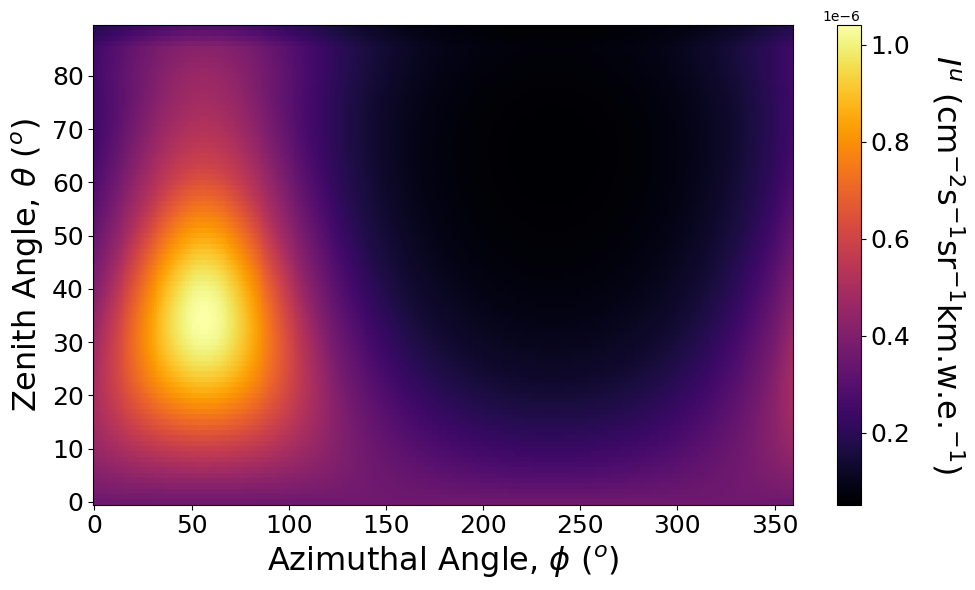

In [7]:
fig = plt.figure(figsize = (10, 6))
ax  = fig.add_subplot(111)

X, Y = np.meshgrid(mtc.mountain.azimuthal, mtc.mountain.zenith)

cbar = plt.colorbar(ax.pcolormesh(X, Y, u_intensities, cmap = "inferno", shading = "auto"))
cbar.set_label("$I^u$ (cm$^{-2}$s$^{-1}$sr$^{-1}$km.w.e.$^{-1}$)", fontsize = 23, rotation = 270, labelpad = 40)
cbar.ax.tick_params(axis = "both", which = "major", labelsize = 18)

ax.set_xlabel(r"Azimuthal Angle, $\phi$ ($^o$)", fontsize = 23)
ax.set_ylabel(r"Zenith Angle, $\theta$ ($^o$)", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)
ax.yaxis.offsetText.set_fontsize(16)

plt.tight_layout()
plt.show()

## Calculate the Total Underground Flux

The ``mtu.calc_u_tot_flux()`` function integrates the intensites calculated by ``mtu.calc_u_intensities()`` over all of the zenith angles and azimuthal angles from the mountain profile file.

In [8]:
mtu.calc_u_tot_flux(model = "daemonflux")

Calculating underground fluxes.
Loading surface fluxes for daemonflux.
Loaded surface fluxes.
Survival probabilities already loaded for rock with density 2.65 gcm^-3 and 1000000 muons.
Finished calculating underground fluxes.
Calculating underground intensities.
Finished calculating underground intensities.


1.6110883613578923e-06